In [1]:
import numpy as np
from torch import Tensor
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import torch as t
from fun_ctions import rot
import fun_ctions as fun
from scipy.spatial.transform import Rotation as R
from MOT_Classes import Environment,Rubidium,particles,forward
from tqdm import tqdm
import MOT_vars as vr
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

 

In [12]:
particles.createuniform(T=0.01,N=200)

Environment.Imax=14

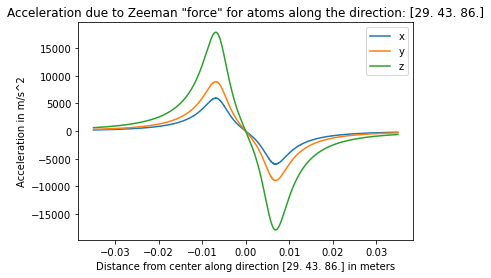

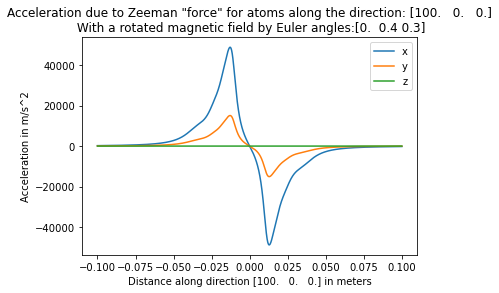

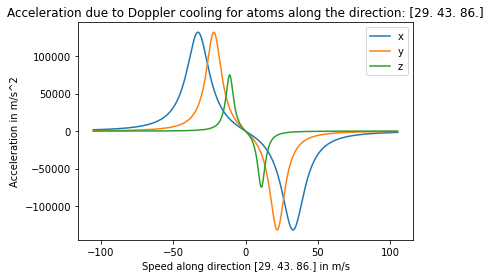

In [14]:
if False: #zeeman in x
    xsh,ysh,zsh=2000,1,1
    pos=t.zeros((3,xsh,ysh,zsh))
    pos[0],pos[1],pos[2]=t.meshgrid(t.linspace(-0.3,0.3,xsh),t.linspace(-0.01,0.9,ysh),t.linspace(-0.01,0.5,zsh))
    pos=pos.reshape(3,xsh*ysh*zsh).transpose(0,1).numpy()
    vel=t.zeros((xsh*ysh*zsh,3)).numpy()
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    Accel=Accel.unsqueeze(0).unsqueeze(0)
    Accel=Accel.reshape(xsh,ysh,zsh,3)
    plt.plot(np.linspace(-0.3,0.3,xsh,endpoint=True),Accel[:,0,0,0].cpu().numpy())
    plt.show()
    
if False: #zeeman in y
    xsh,ysh,zsh=1,2000,1
    pos=t.zeros((3,xsh,ysh,zsh))
    pos[0],pos[1],pos[2]=t.meshgrid(t.linspace(-0.01,0.9,xsh),t.linspace(-0.3,0.3,ysh),t.linspace(-0.01,0.5,zsh))
    pos=pos.reshape(3,xsh*ysh*zsh).transpose(0,1).numpy()
    vel=t.zeros((xsh*ysh*zsh,3)).numpy()
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    Accel=Accel.unsqueeze(0).unsqueeze(0)
    Accel=Accel.reshape(xsh,ysh,zsh,3)
    plt.plot(np.linspace(-0.3,0.3,ysh,endpoint=True),Accel[0,:,0,1].cpu().numpy())
    plt.show()
    
if False: #zeeman in z
    xsh,ysh,zsh=1,1,2000
    pos=t.zeros((3,xsh,ysh,zsh))
    pos[0],pos[1],pos[2]=t.meshgrid(t.linspace(-0.01,0.0,xsh),t.linspace(-0.01,0.9,ysh),t.linspace(-0.3,0.3,zsh))
    pos=pos.reshape(3,xsh*ysh*zsh).transpose(0,1).numpy()
    vel=t.zeros((xsh*ysh*zsh,3)).numpy()
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    Accel=Accel.unsqueeze(0).unsqueeze(0)
    Accel=Accel.reshape(xsh,ysh,zsh,3)
    plt.plot(np.linspace(-0.3,0.3,zsh,endpoint=True),Accel[int(xsh/2),0,:,2].cpu().numpy())
    plt.show()
      
if False: #doppler in z
    xsh,ysh,zsh=5,5,2000
    vel=t.zeros((3,xsh,ysh,zsh))
    vel[0],vel[1],vel[2]=t.meshgrid(t.linspace(-25,25,xsh),t.linspace(-25,25,ysh),t.linspace(-25,25,zsh))
    vel=vel.reshape(3,xsh*ysh*zsh).transpose(0,1).numpy()
    pos=t.zeros((xsh*ysh*zsh,3)).numpy()
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    Accel=Accel.unsqueeze(0).unsqueeze(0)
    Rates=Rates.unsqueeze(0).unsqueeze(2)
    Accel=Accel.reshape(xsh,ysh,zsh,3)
    plt.plot(np.linspace(-0.5,0.5,zsh,endpoint=True),Accel[int(xsh/2),int(ysh/2),:,2].cpu().numpy())
    plt.show
    
if True: #zeeman along a given direction
    direction=0.005*np.array([2,3,6])
    num=100000
    d=np.linalg.norm(direction)
    pos=t.zeros((3,num))
    pos[0]=t.linspace(-direction[0],direction[0],num)
    pos[1]=t.linspace(-direction[1],direction[1],num)
    pos[2]=t.linspace(-direction[2],direction[2],num)
    pos=pos.transpose(0,1)
    vel=t.zeros((3,num)).transpose(0,1)
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward(ratemults='dynamic')
    A=Accel.cpu().numpy()
    plt.title('Acceleration due to Zeeman \"force\" for atoms along the direction: '+str(np.round(100*direction/d)))
    plt.plot(np.linspace(-d,d,num),A[:,0],label='x')
    plt.plot(np.linspace(-d,d,num),A[:,1],label='y')
    plt.plot(np.linspace(-d,d,num),A[:,2],label='z')
    plt.xlabel('Distance from center along direction ' +str(np.round(100*direction/d))+' in meters')
    plt.ylabel('Acceleration in m/s^2')
    plt.legend()
    plt.show()

if True: #zeeman acceleration along a given direction with modified rotation of aHH field
    Ahhmod=[0,.4,.3]
    Environment.aHHassym=rot(alpha=Ahhmod[0],beta=Ahhmod[1],gamma=Ahhmod[2])
    direction=0.1*np.array([1,0,0])
    num=100000
    d=np.linalg.norm(direction)
    pos=t.zeros((3,num))
    pos[0]=t.linspace(-direction[0],direction[0],num)
    pos[1]=t.linspace(-direction[1],direction[1],num)
    pos[2]=t.linspace(-direction[2],direction[2],num)
    pos=pos.transpose(0,1)
    vel=t.zeros((3,num)).transpose(0,1)
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    A=Accel.cpu().numpy()
    plt.title('Acceleration due to Zeeman \"force\" for atoms along the direction: '+str(np.round(100*direction/d))+'\n With a rotated magnetic field by Euler angles:'+str(np.array(Ahhmod)))
    plt.plot(np.linspace(-d,d,num),A[:,0],label='x')
    plt.plot(np.linspace(-d,d,num),A[:,1],label='y')
    plt.plot(np.linspace(-d,d,num),A[:,2],label='z')
    plt.xlabel('Distance along direction ' +str(np.round(100*direction/d))+' in meters')
    plt.ylabel('Acceleration in m/s^2')
    plt.legend()
    plt.show()    
    Environment.aHHassym=rot(alpha=0,beta=0)
    
if True: #doppler along a given direction
    direction=15*np.array([2,3,6])
    d=np.linalg.norm(direction)
    num=5000
    vel=t.zeros((3,num))
    vel[0]=t.linspace(-direction[0],direction[0],num)
    vel[1]=t.linspace(-direction[1],direction[1],num)
    vel[2]=t.linspace(-direction[2],direction[2],num)
    vel=vel.transpose(0,1)
    pos=t.zeros((3,num)).transpose(0,1)
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    A=Accel.cpu().numpy()
    plt.title('Acceleration due to Doppler cooling for atoms along the direction: '+str(np.round(100*direction/d)))
    plt.plot(np.linspace(-d,d,num),A[:,0],label='x')
    plt.plot(np.linspace(-d,d,num),A[:,1],label='y')
    plt.plot(np.linspace(-d,d,num),A[:,2],label='z')
    plt.xlabel('Speed along direction ' +str(np.round(100*direction/d))+' in m/s')
    plt.ylabel('Acceleration in m/s^2')
    plt.legend()
    plt.show()


In [ ]:
print(Environment.Is)
print(Environment.Kmag)
print(A[0,0])

In [14]:
Kappa=[]
for j in tqdm(range(30), desc="simulating"):
    particles.create(T=300, N=100000)
    Simlen=600
    x,v=particles.init_track(Simlen=Simlen)
    tstep=0.0001
    for i in range (Simlen):
        _,_  =forward(timestep=tstep,acceladj=True,grav=True) 
        x,v=particles.track(x,v,i)
        if i%10==0:
            insidemot=t.where(t.sum(particles.x*particles.x,dim=1)<0.1)[0].to(t.long)
            particles.keep(insidemot)

    s=t.round(1000*t.norm(particles.v,dim=1))
    k=0
    for i in s:
        if i==0:
            k+=1
            
    Kappa.append(k)


simulating:   0%|          | 0/30 [00:04<?, ?it/s]


IndexError: index 0 is out of bounds for dimension 0 with size 0

In [30]:
particles.createuniform(T=1,N=200)

In [31]:
Simlen=500
x,v=particles.init_track(Simlen=Simlen)
tstep=0.00002
for i in tqdm(range (Simlen), desc="simulating"):
    _,_  =forward(timestep=tstep,acceladj=True,grav=True,ratemults='dynamic') 
    x,v=particles.track(x,v,i)
    '''
    if i%10==0:
        insidemot=t.where(t.sum(particles.x*particles.x,dim=1)<0.4)[0].to(t.long)
        particles.keep(insidemot)'''
        

print(particles.l.shape)

simulating: 100%|██████████| 500/500 [00:25<00:00, 19.84it/s]

torch.Size([200, 5])


In [7]:
print(particles.u[0])
print(particles.l[0])
print(t.sum(particles.u[0])+t.sum(particles.l[0]))
print(t.norm(particles.v[0]))

tensor([0.0336, 0.0489, 0.0588, 0.0624, 0.0588, 0.0488, 0.0335],
       device='cuda:0')
tensor([0.1081, 0.1425, 0.1542, 0.1424, 0.1080], device='cuda:0')
tensor(1., device='cuda:0')
tensor(1.8656e-07, device='cuda:0')


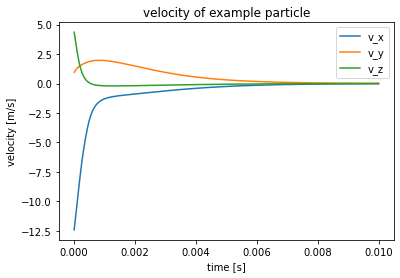

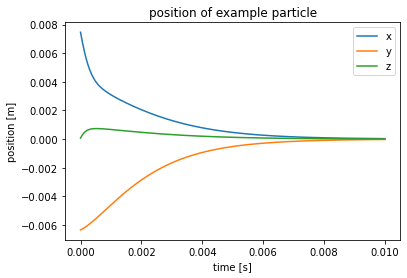

In [33]:
nmin=1

plt.title('velocity of example particle')
plt.plot(np.linspace(0,Simlen*tstep,Simlen+1-nmin),v[nmin:,0].cpu(),label='v_x')
plt.plot(np.linspace(0,Simlen*tstep,Simlen+1-nmin),v[nmin:,1].cpu(),label='v_y')
plt.plot(np.linspace(0,Simlen*tstep,Simlen+1-nmin),v[nmin:,2].cpu(),label='v_z')
plt.xlabel("time [s]")
plt.ylabel("velocity [m/s]")
plt.legend()
plt.show()
plt.plot(np.linspace(0,Simlen*tstep,Simlen+1-nmin),x[nmin:,0].cpu(),label='x')
plt.plot(np.linspace(0,Simlen*tstep,Simlen+1-nmin),x[nmin:,1].cpu(),label='y')
plt.plot(np.linspace(0,Simlen*tstep,Simlen+1-nmin),x[nmin:,2].cpu(),label='z')
plt.title('position of example particle')
plt.xlabel("time [s]")
plt.ylabel("position [m]")
plt.legend()
plt.show()

In [ ]:
print(particles.x.shape)

In [ ]:
print(t.round(1000*t.norm(particles.v,dim=1)))
T=t.round(1000*t.norm(particles.v,dim=1))
k=0
for i in T:
    if i==0:
        k+=1
print(k)

In [6]:
temps=[]
prop=[]
for Tinv in tqdm(range(1,300),desc="running simulations"):
    T=Tinv*0.025
    temps.append(T)
    particles.createuniform(T=T)
    Simlen=300
    
    x,v=particles.init_track(Simlen=Simlen)
    tstep=0.0001
    trapped=0
    for i in range (Simlen):
        _,_  =forward(timestep=tstep,ratemults='dynamic',acceladj=True,grav=True)
        x,v=particles.track(x,v,i)
        if i%10==0:
            insidemot=t.where(t.norm(particles.x*particles.x,dim=1)<0.1)[0].to(t.long)
            particles.keep(insidemot)
            notstuck=t.where(t.norm(particles.v,dim=1)>0.0001)[0].to(t.long)
            particles.keep(notstuck)
            trapped+=insidemot.shape[0]-notstuck.shape[0]
            #print(insidemot.shape[0]-notstuck.shape[0])
            if particles.v.shape[0]==0 or particles.v.shape[0]==1:
                break
        
    prop.append(trapped/5000)
    

    


running simulations: 100%|██████████| 99/99 [20:56<00:00, 12.69s/it]


In [16]:
particles.createuniform(T=2)
Simlen=300

x,v=particles.init_track(Simlen=Simlen)
tstep=0.0001
trapped=0
for i in tqdm(range (Simlen),desc='running simulations'):
    _,_  =forward(timestep=tstep,ratemults='dynamic',acceladj=True,grav=True)
    x,v=particles.track(x,v,i)
    if i%10==0:
        insidemot=t.where(t.norm(particles.x*particles.x,dim=1)<0.1)[0].to(t.long)
        particles.keep(insidemot)
        notstuck=t.where(t.norm(particles.v,dim=1)>0.0001)[0].to(t.long)
        particles.keep(notstuck)
        trapped+=insidemot.shape[0]-notstuck.shape[0]
        #print(insidemot.shape[0]-notstuck.shape[0])
        if particles.v.shape[0]==0 or particles.v.shape[0]==1:
            break
    
print(trapped)
print(particles.l[0])
print(particles.u[0])

running simulations:   5%|▌         | 15/300 [00:02<00:38,  7.47it/s]


KeyboardInterrupt: 

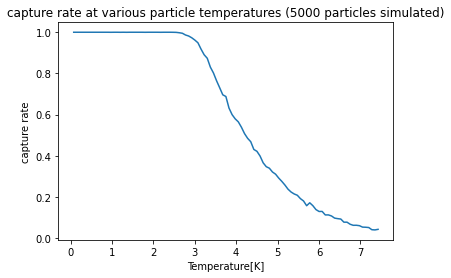

In [7]:
prop=np.array(prop)
plt.plot(temps,prop)
plt.xlabel("Temperature[K]")
plt.ylabel("capture rate")
plt.title("capture rate at various particle temperatures (5000 particles simulated)")
plt.show()  

In [ ]:
S=[]
for i in tqdm(range(1,600)):
    Bgrad=i/10000
    Environment.BaHH=Tensor([Bgrad,Bgrad,-2*Bgrad]).to(vr.base_device) #zeeman along a given direction
    direction=1*np.array([1,1,1])
    num=10000
    d=np.linalg.norm(direction)
    pos=t.zeros((3,num))
    pos[0]=t.linspace(-direction[0],direction[0],num)
    pos[1]=t.linspace(-direction[1],direction[1],num)
    pos[2]=t.linspace(-direction[2],direction[2],num)
    pos=pos.transpose(0,1)
    vel=t.zeros((3,num)).transpose(0,1)
    particles.createbyinp(pos,vel,2,3)
    Accel,_=forward()
    A=Accel.cpu().numpy()[:,0]
    #size=max(A)
    size=abs(np.where(A==min(A))[0]-np.where(A==max(A))[0])*d/num
    S.append(size[0])
S=np.array(S)
Environment.BaHH=vr.A*Tensor([1,1,-2]).to(vr.base_device)
'''
    plt.title('Acceleration due to Zeeman trapping for atoms along the direction: '+str(np.round(100*direction/d)))
    plt.plot(np.linspace(-d,d,num),A[:,0],label='x')
    plt.plot(np.linspace(-d,d,num),A[:,1],label='y')
    plt.plot(np.linspace(-d,d,num),A[:,2],label='z')
    plt.xlabel('Distance along direction ' +str(np.round(100*direction/d))+' in meters')
    plt.ylabel('Acceleration in m/s^2')
    plt.legend()
    plt.show()
    print(np.sum(A[int(num/2):,0]*d/num))
    '''


In [ ]:
plt.plot(A[14950:15050])
print(size)

In [ ]:
dtun=np.linspace(1,100,99)/50*vr.dtun/(2e6*3.1415)
Bgrad=np.linspace(1,100,99)/500
X1,X2=np.meshgrid(dtun,Bgrad)
Z=S.cpu().numpy().T
fig=plt.figure()
fig.add_subplot()
fig=plt.pcolor(dtun,Bgrad,np.log(Z))
plt.xlabel('detuning (MHz)')
plt.ylabel('B-field Gradient(Tesla/m)')
plt.title('logarithm of MOT size as a function of laser detunement and B field gradient')
plt.colorbar(fig)    
plt.show(fig)
'''
print(X1.shape)
fig, ax = plt.subplots()
print(S.cpu().numpy().shape)
ax.plot_surface(X1, X2, Z, cmap=cm.jet)
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')


plt.show()'''
print(np.log(0.001))


In [ ]:
X=0.01*np.linspace(1,300,num=299,endpoint=True)
plt.plot(X,S)
plt.xlabel("")
plt.ylabel("")
plt.show()

In [166]:
_,R=forward()
dt=0.001
matmul=400000
R=t.sum(t.round(R),dim=1).to(vr.base_device)
M=t.zeros((particles.x.shape[0],12,12)).to(vr.base_device)
Rsl=t.sum(R,dim=1).unsqueeze(2)
Rsu=t.sum(R,dim=2).unsqueeze(2)

M[:,5:,5:]+=t.diag(t.ones(R.shape[2])*-Rubidium.Gamma).to(vr.base_device)
M[:,5:,5:]-=t.diag_embed(Rsl.squeeze(),dim1=1,dim2=0).transpose(0,2).to(vr.base_device)
M[:,:5,:5]=-t.diag_embed(Rsu.squeeze(),dim1=1,dim2=0).transpose(0,2).to(vr.base_device)
M[:,5:,:5]+=R.transpose(1,2).to(vr.base_device)
M[:,5:,:5]+=Rubidium.Gamma*t.mul(t.ones((R.shape[0],R.shape[1],R.shape[2]),device='cuda'),1/15*Rubidium.BranRat).transpose(1,2).to(vr.base_device)
M[:,:5,5:]+=R.to(vr.base_device)
M=M.transpose(1,2)
ratemulmin=int(t.max(M)*dt)

phi=t.cat((particles.l,particles.u),dim=1).unsqueeze(2)
K=t.diag_embed(t.ones((M.shape[0],M.shape[1])).to(vr.base_device),dim1=1,dim2=0).transpose(0,2)+dt/matmul*M
phi=t.matmul(t.linalg.matrix_power(K,matmul),phi)
phi=t.divide(phi.squeeze().transpose(0,1),t.sum(phi,dim=1).squeeze()).transpose(0,1) #renormalization
print(phi[0])
particles.l=phi[:,:5]
particles.u=phi[:,5:]
'''
val,vec=t.linalg.eig(M[0])
val=val.cpu().numpy()
i=np.where(abs(val)==0.0)
print(vec[0])
print(val)

print(t.divide(vec[i][0],t.norm(vec[i][0],p=1)))
print(t.matmul(M[0],vec[i][0]))
print(i)
print(abs(val))'''

163257
tensor([0.1900, 0.1615, 0.1158, 0.0707, 0.0348, 0.1412, 0.1162, 0.0799, 0.0480,
        0.0255, 0.0120, 0.0044], device='cuda:0')


'\nval,vec=t.linalg.eig(M[0])\nval=val.cpu().numpy()\ni=np.where(abs(val)==0.0)\nprint(vec[0])\nprint(val)\n\nprint(t.divide(vec[i][0],t.norm(vec[i][0],p=1)))\nprint(t.matmul(M[0],vec[i][0]))\nprint(i)\nprint(abs(val))'

In [ ]:
I=t.diag(t.ones(M.shape[2])).unsqueeze(0).repeat(M.shape[0],1,1)

In [ ]:
I=t.diag_embed(t.ones((M.shape[0],M.shape[1])).to(vr.base_device),dim1=1,dim2=0).transpose(0,2)

In [5]:
temps=[]
prop=[]

particles.create(T=300, N=500000)
Simlen=700

x,v=particles.init_track(Simlen=Simlen)
tstep=0.0001
trapped=0
for i in tqdm(range (Simlen),desc='simulating'):
    _,_  =forward(timestep=tstep,ratemults='dynamic',acceladj=True,grav=True)
    x,v=particles.track(x,v,i)
    if i%10==0:
        insidemot=t.where(t.norm(particles.x*particles.x,dim=1)<0.1)[0].to(t.long)
        particles.keep(insidemot)
        notstuck=t.where(t.norm(particles.v,dim=1)>0.0001)[0].to(t.long)
        particles.keep(notstuck)
        trapped+=insidemot.shape[0]-notstuck.shape[0]
        #print(insidemot.shape[0]-notstuck.shape[0])
        if particles.v.shape[0]==0 or particles.v.shape[0]==1:
            break
print(trapped)
    

    


simulating: 100%|██████████| 700/700 [01:23<00:00,  8.42it/s]

709


In [6]:
print(particles.v.shape)

torch.Size([43, 3])
